In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
plt.rcParams['figure.figsize'] = 7,7
plt.rcParams['axes.linewidth'] = 2.0
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [12]:
def process_csv_file(csv_file):
    # Load the CSV into a pandas DataFrame
    df = pd.read_csv(csv_file, header=None, names=['ID', 'RMSD', 'z_increment', 'pert_num'])

    # Calculate average RMSD
    avg_rmsd = df['RMSD'].mean()

    # Extract z_increment and pert_num
    z_increment = df['z_increment'].iloc[0]
    pert_num = df['pert_num'].iloc[0]

    return avg_rmsd, z_increment, pert_num

In [13]:
def process_directories(base_dir,target_csv):
    results = []
    for subdir, _, files in os.walk(base_dir):
        if target_csv in files:
            csv_file = os.path.join(subdir, target_csv)
            avg_rmsd, z_increment, pert_num = process_csv_file(csv_file)
            if avg_rmsd is not None:
                results.append([subdir, avg_rmsd, z_increment, pert_num])
    
    # Convert the results to a pandas DataFrame
    return pd.DataFrame(results, columns=['Directory', 'Average_RMSD', 'z_increment', 'pert_num'])

In [14]:
os.chdir("/home/cadeniran/storage/cadeniran/mpp/amphiscan-pep/")
base_dir = "results_grid/"  # Specify the base directory
output_file = "rmsd_results.csv"  # Output CSV file
target_csv = "rmsd_values.csv" #csv to look for in each subdir

In [15]:
data = []
data = process_directories(base_dir,target_csv)

In [16]:
datamap = data.pivot(index="pert_num", columns="z_increment", values="Average_RMSD")

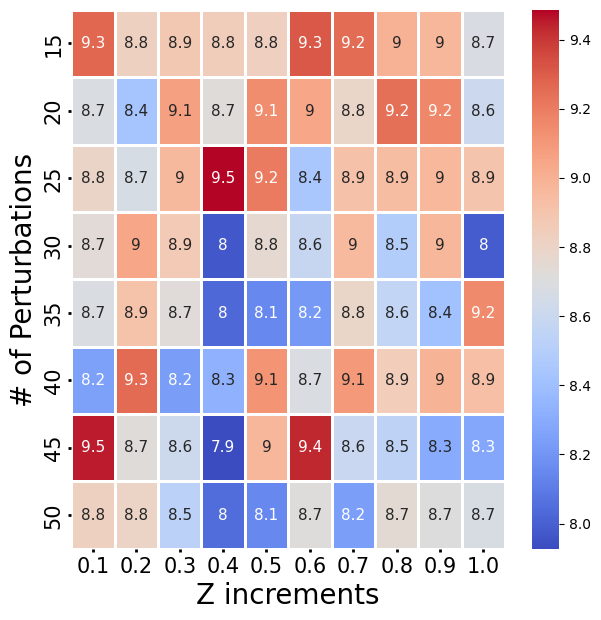

In [17]:
sns.heatmap(datamap, annot=True, linewidth=2, cmap="coolwarm", annot_kws={"fontsize":11})

plt.xlabel("Z increments", fontsize = 20)
plt.ylabel("# of Perturbations", fontsize = 20)
plt.tick_params(axis='both', labelsize='15', length=2, width=2)
plt.savefig("/home/cadeniran/ipn/figs/heatmap.png", transparent=True)